In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Preprocessing

In [3]:
df = pd.get_dummies(df,columns=['ShelveLoc','Urban','US'], drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,1,1


# Visualization

<AxesSubplot:xlabel='Education', ylabel='Income'>

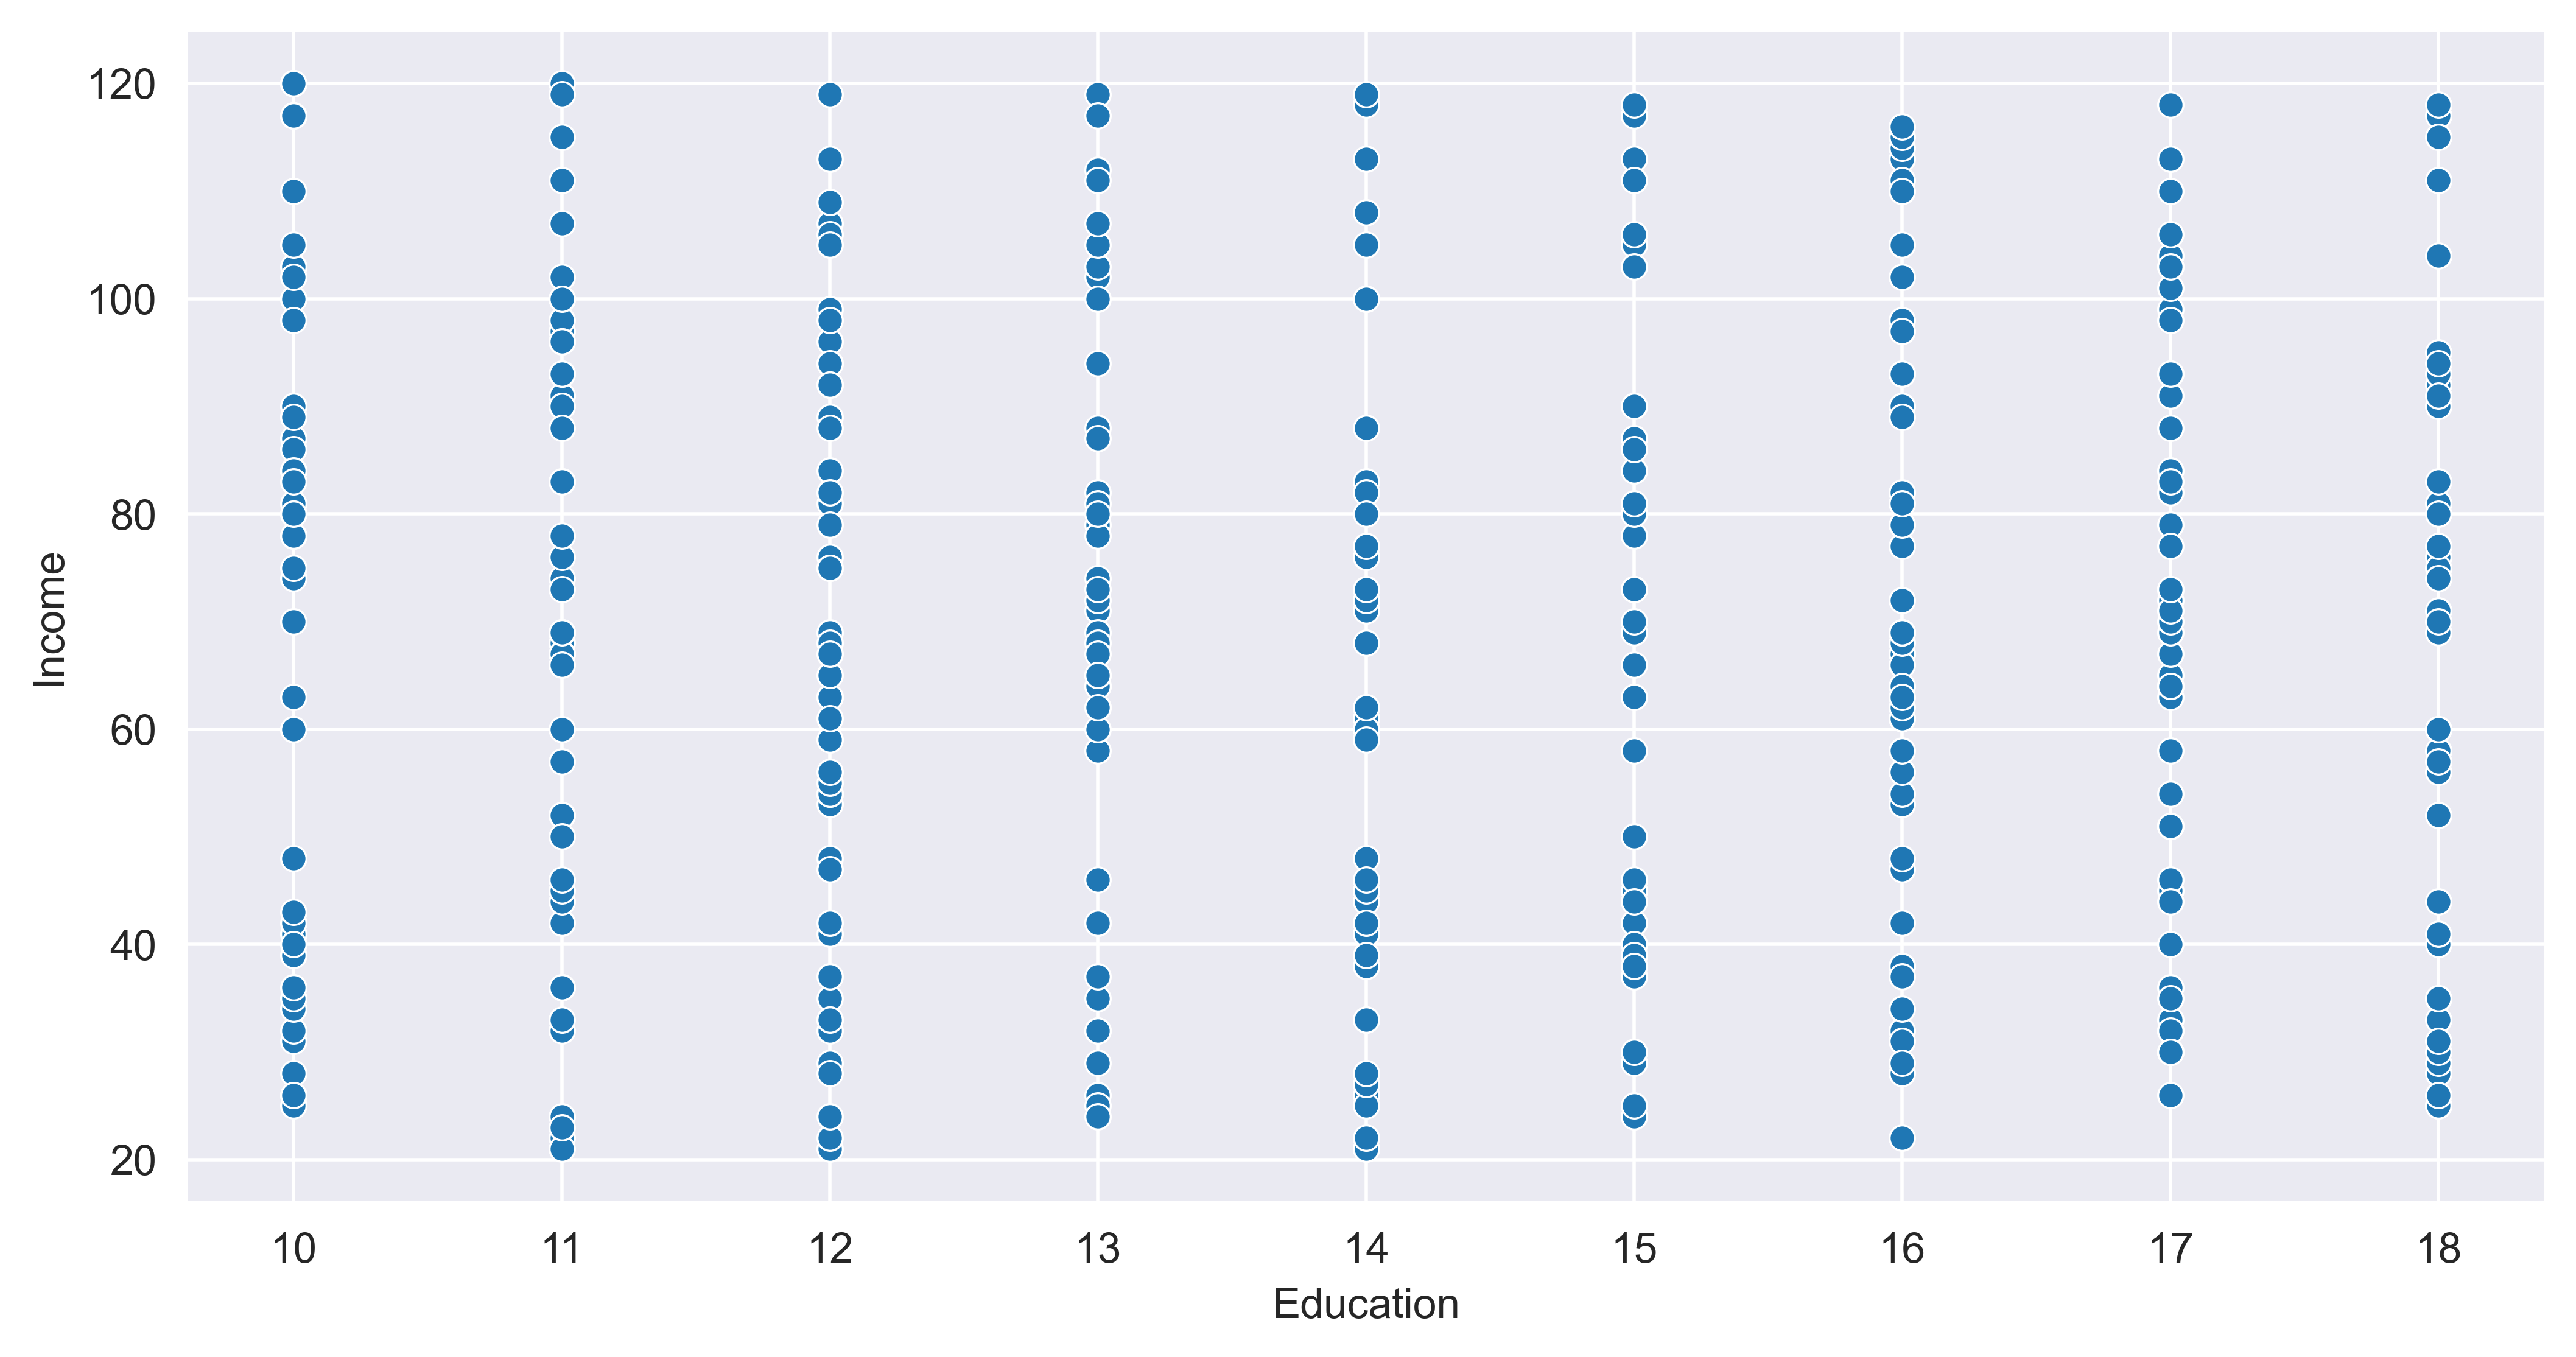

In [5]:
sns.scatterplot(x=df['Education'],y=df['Income'])

<AxesSubplot:xlabel='Age', ylabel='Income'>

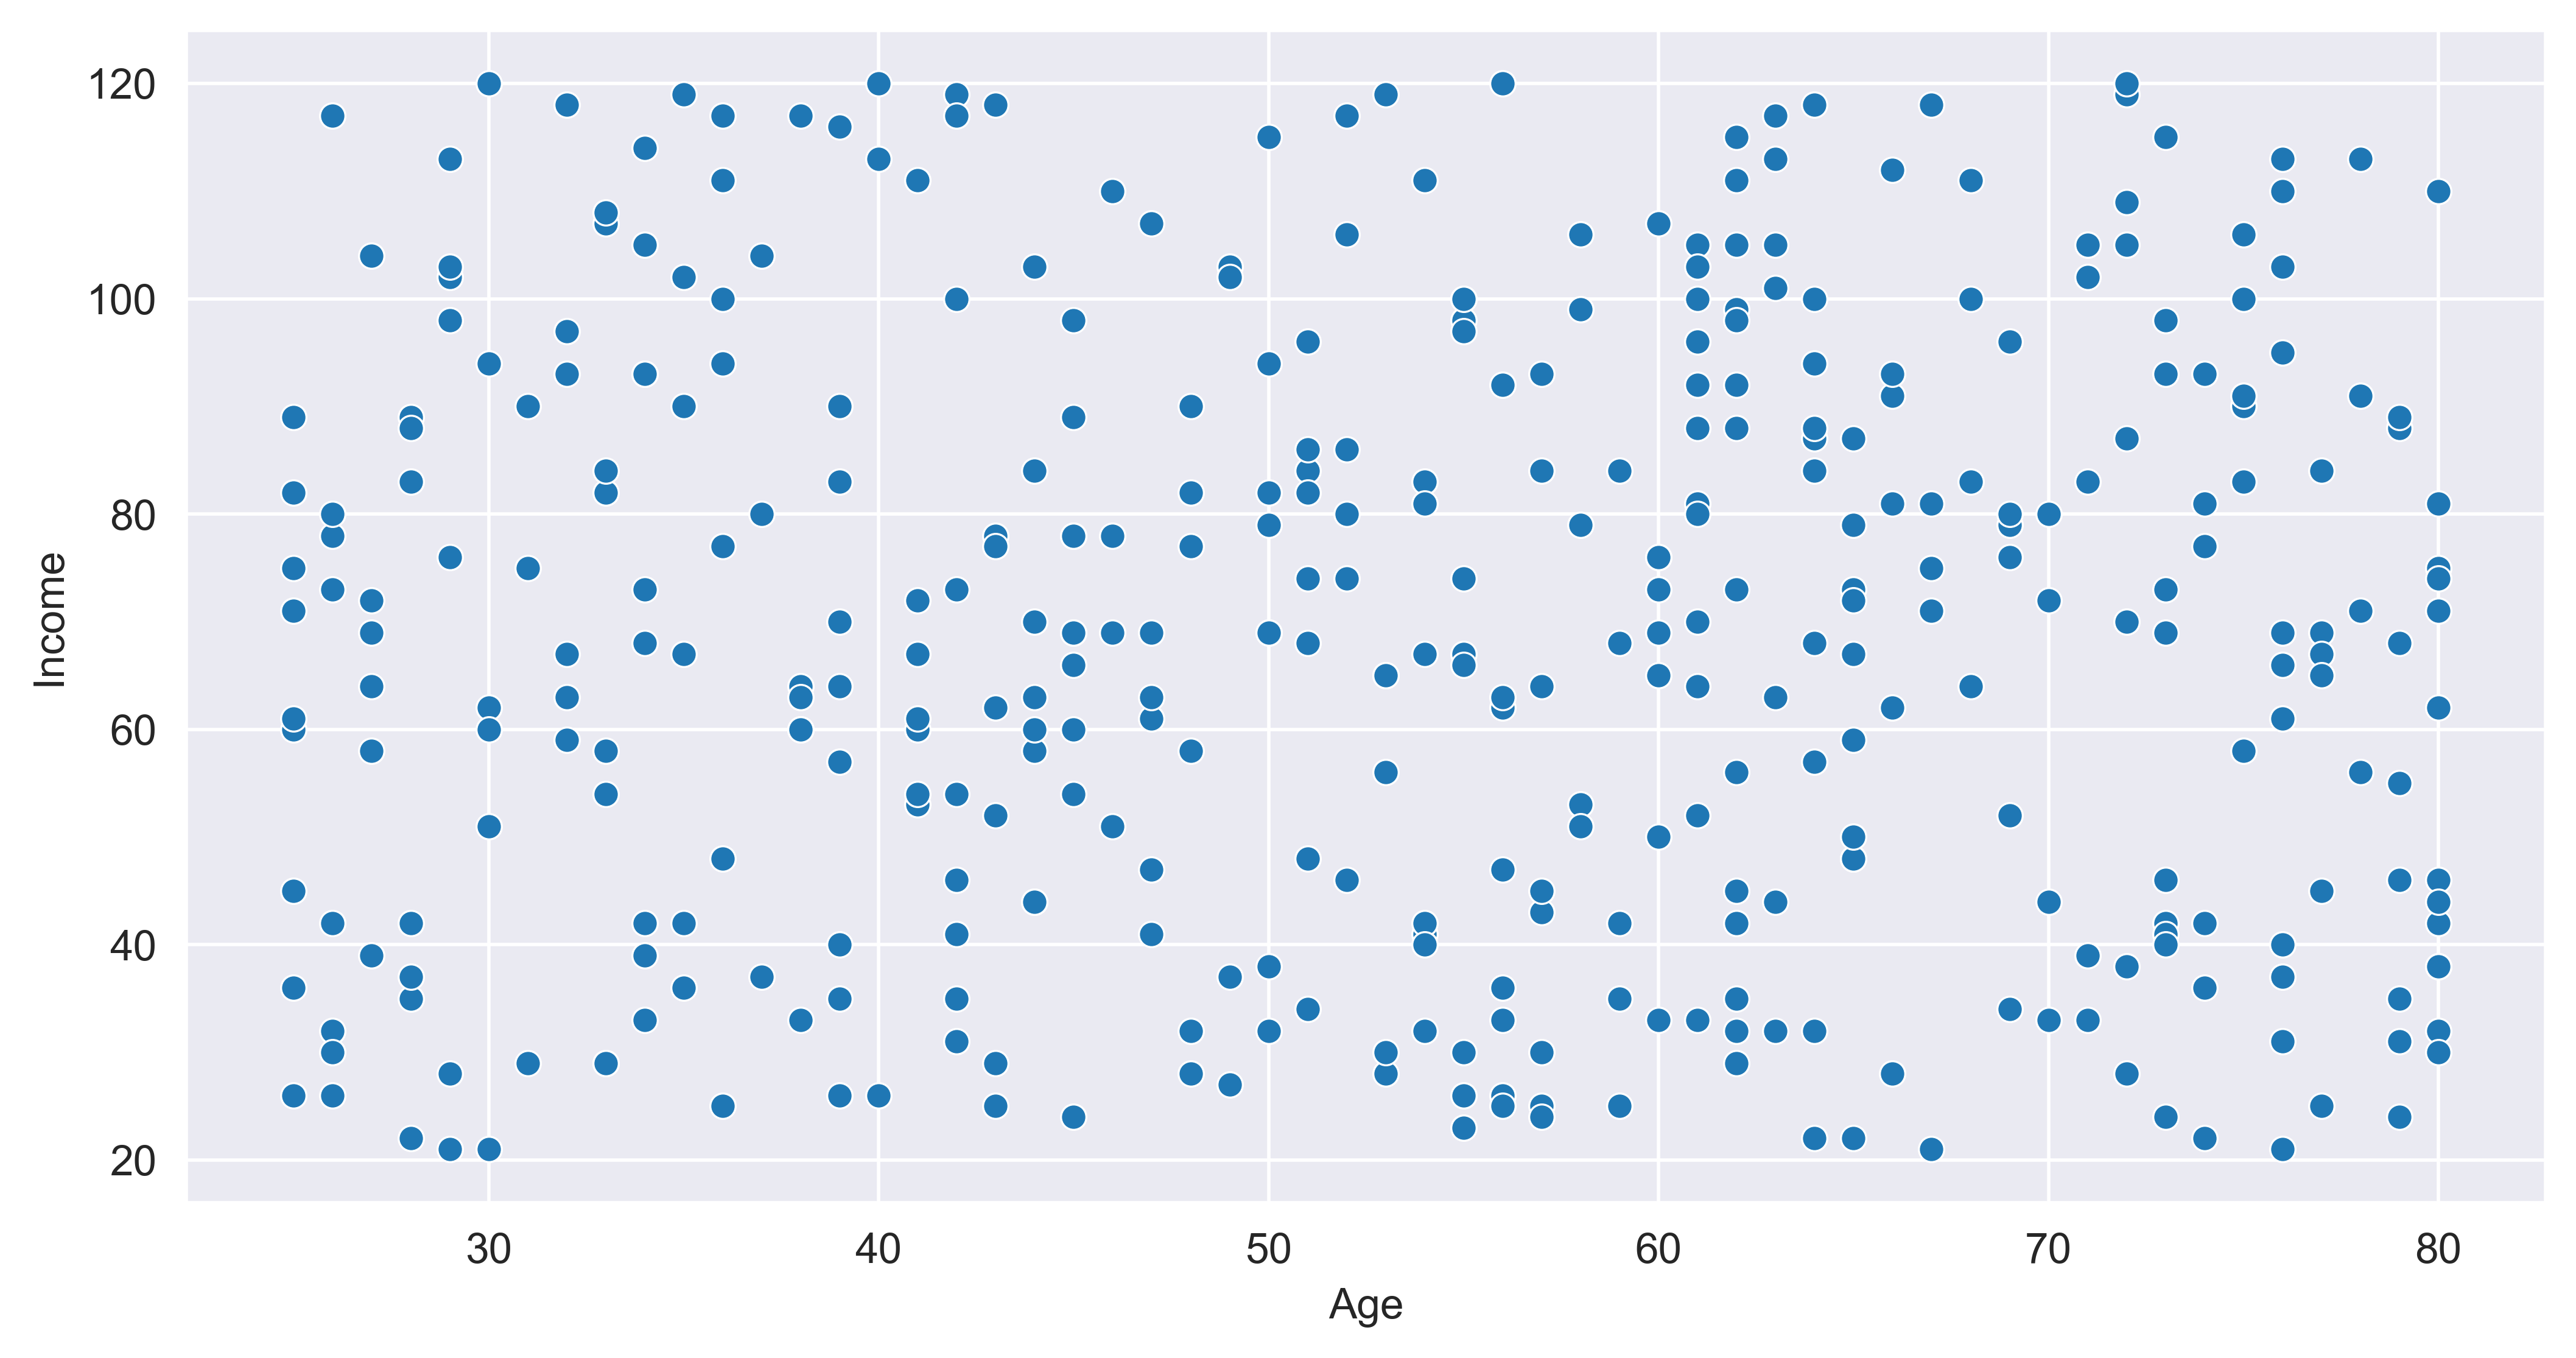

In [6]:
sns.scatterplot(x=df['Age'],y=df['Income'])

<AxesSubplot:xlabel='CompPrice', ylabel='Sales'>

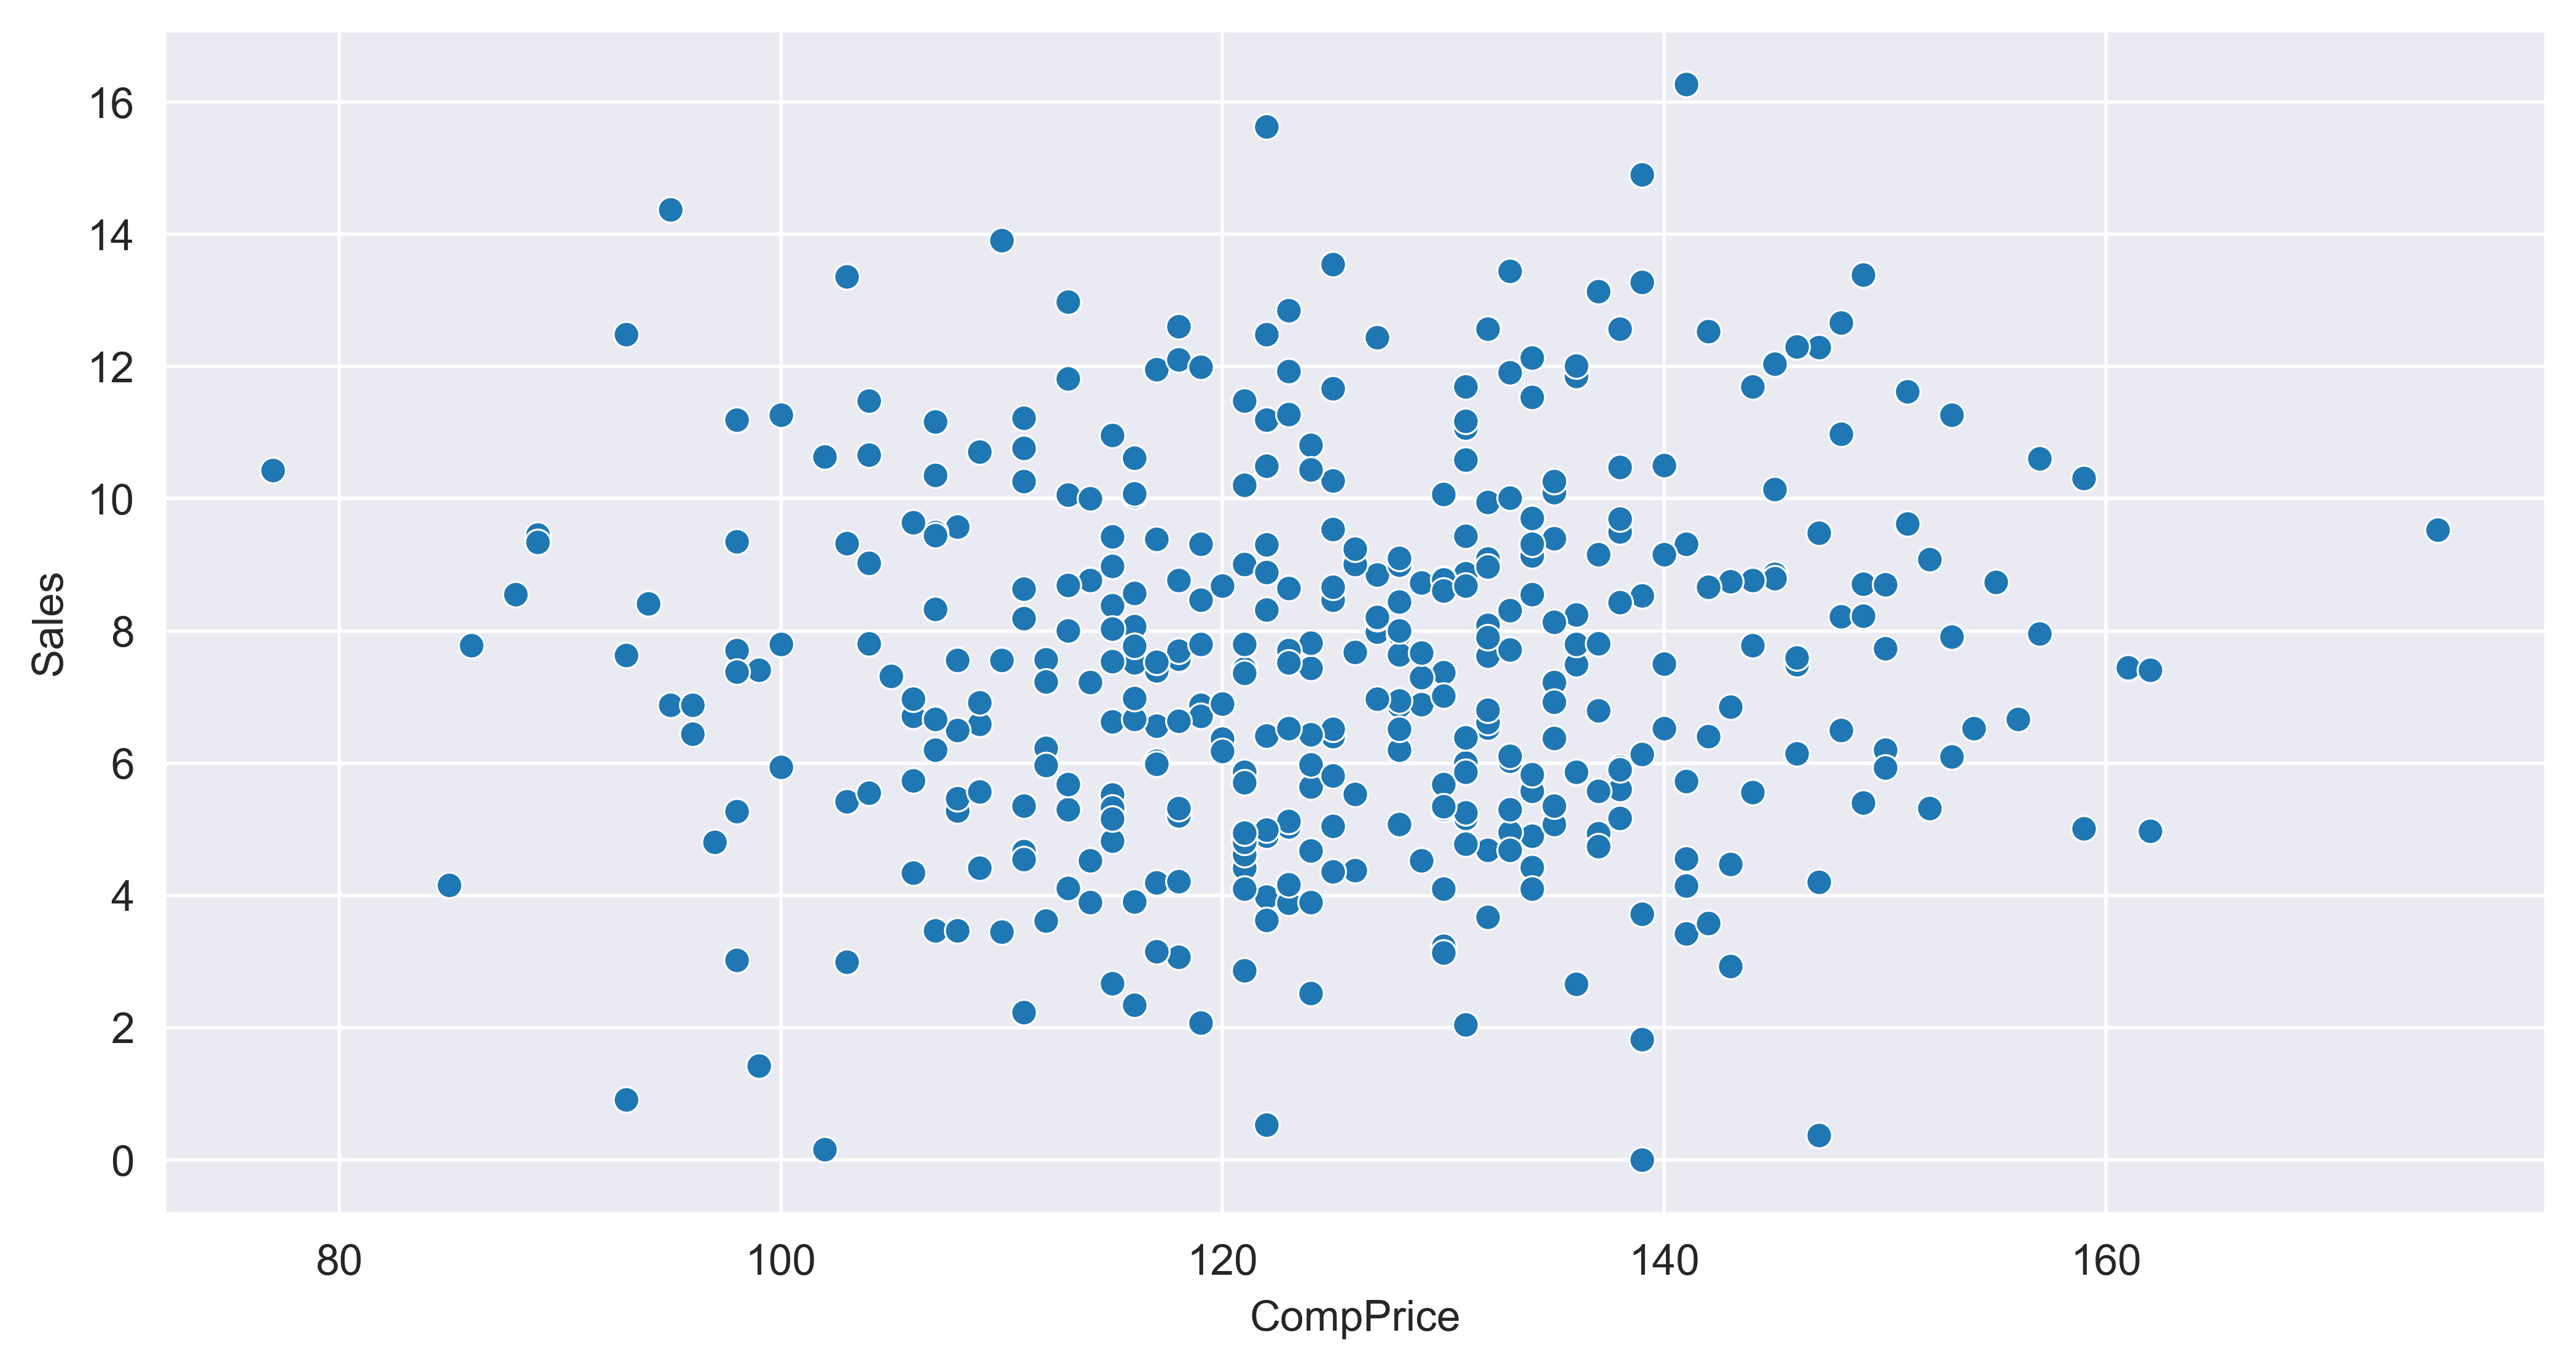

In [7]:
sns.scatterplot(x=df['CompPrice'],y=df['Sales'])

# Decision Tree


In [18]:
x= df.drop('Sales',axis=1)
y = df['Sales']

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
dt_r = DecisionTreeRegressor().fit(xtrain,ytrain)

In [28]:
print(f"Training Accuracy is:  {dt_r.score(xtrain,ytrain)}")
print(f"Training Accuracy is:  {dt_r.score(xtest,ytest)}")

Training Accuracy is:  1.0
Training Accuracy is:  0.3965550159842799


# Hyper Parameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = { 
    'criterion':['squared_error', 'absolute_error','friedman_mse'],
    'max_depth' :[15,17,18,20],
    'splitter' : ['best','random'],
    'max_features' : ['sqrt', 'log2'],
    'ccp_alpha' : [0,0.01,0.1,1]
}
grid = GridSearchCV(DecisionTreeRegressor(),params,verbose=1).fit(xtrain,ytrain)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


In [44]:
grid.best_score_ , grid.best_params_ 

(0.2957875306096569,
 {'ccp_alpha': 0.1,
  'criterion': 'friedman_mse',
  'max_depth': 17,
  'max_features': 'log2',
  'splitter': 'best'})

In [42]:
grid.best_estimator_.score(xtest,ytest)

0.39442143043159383

The default Tree give better performance

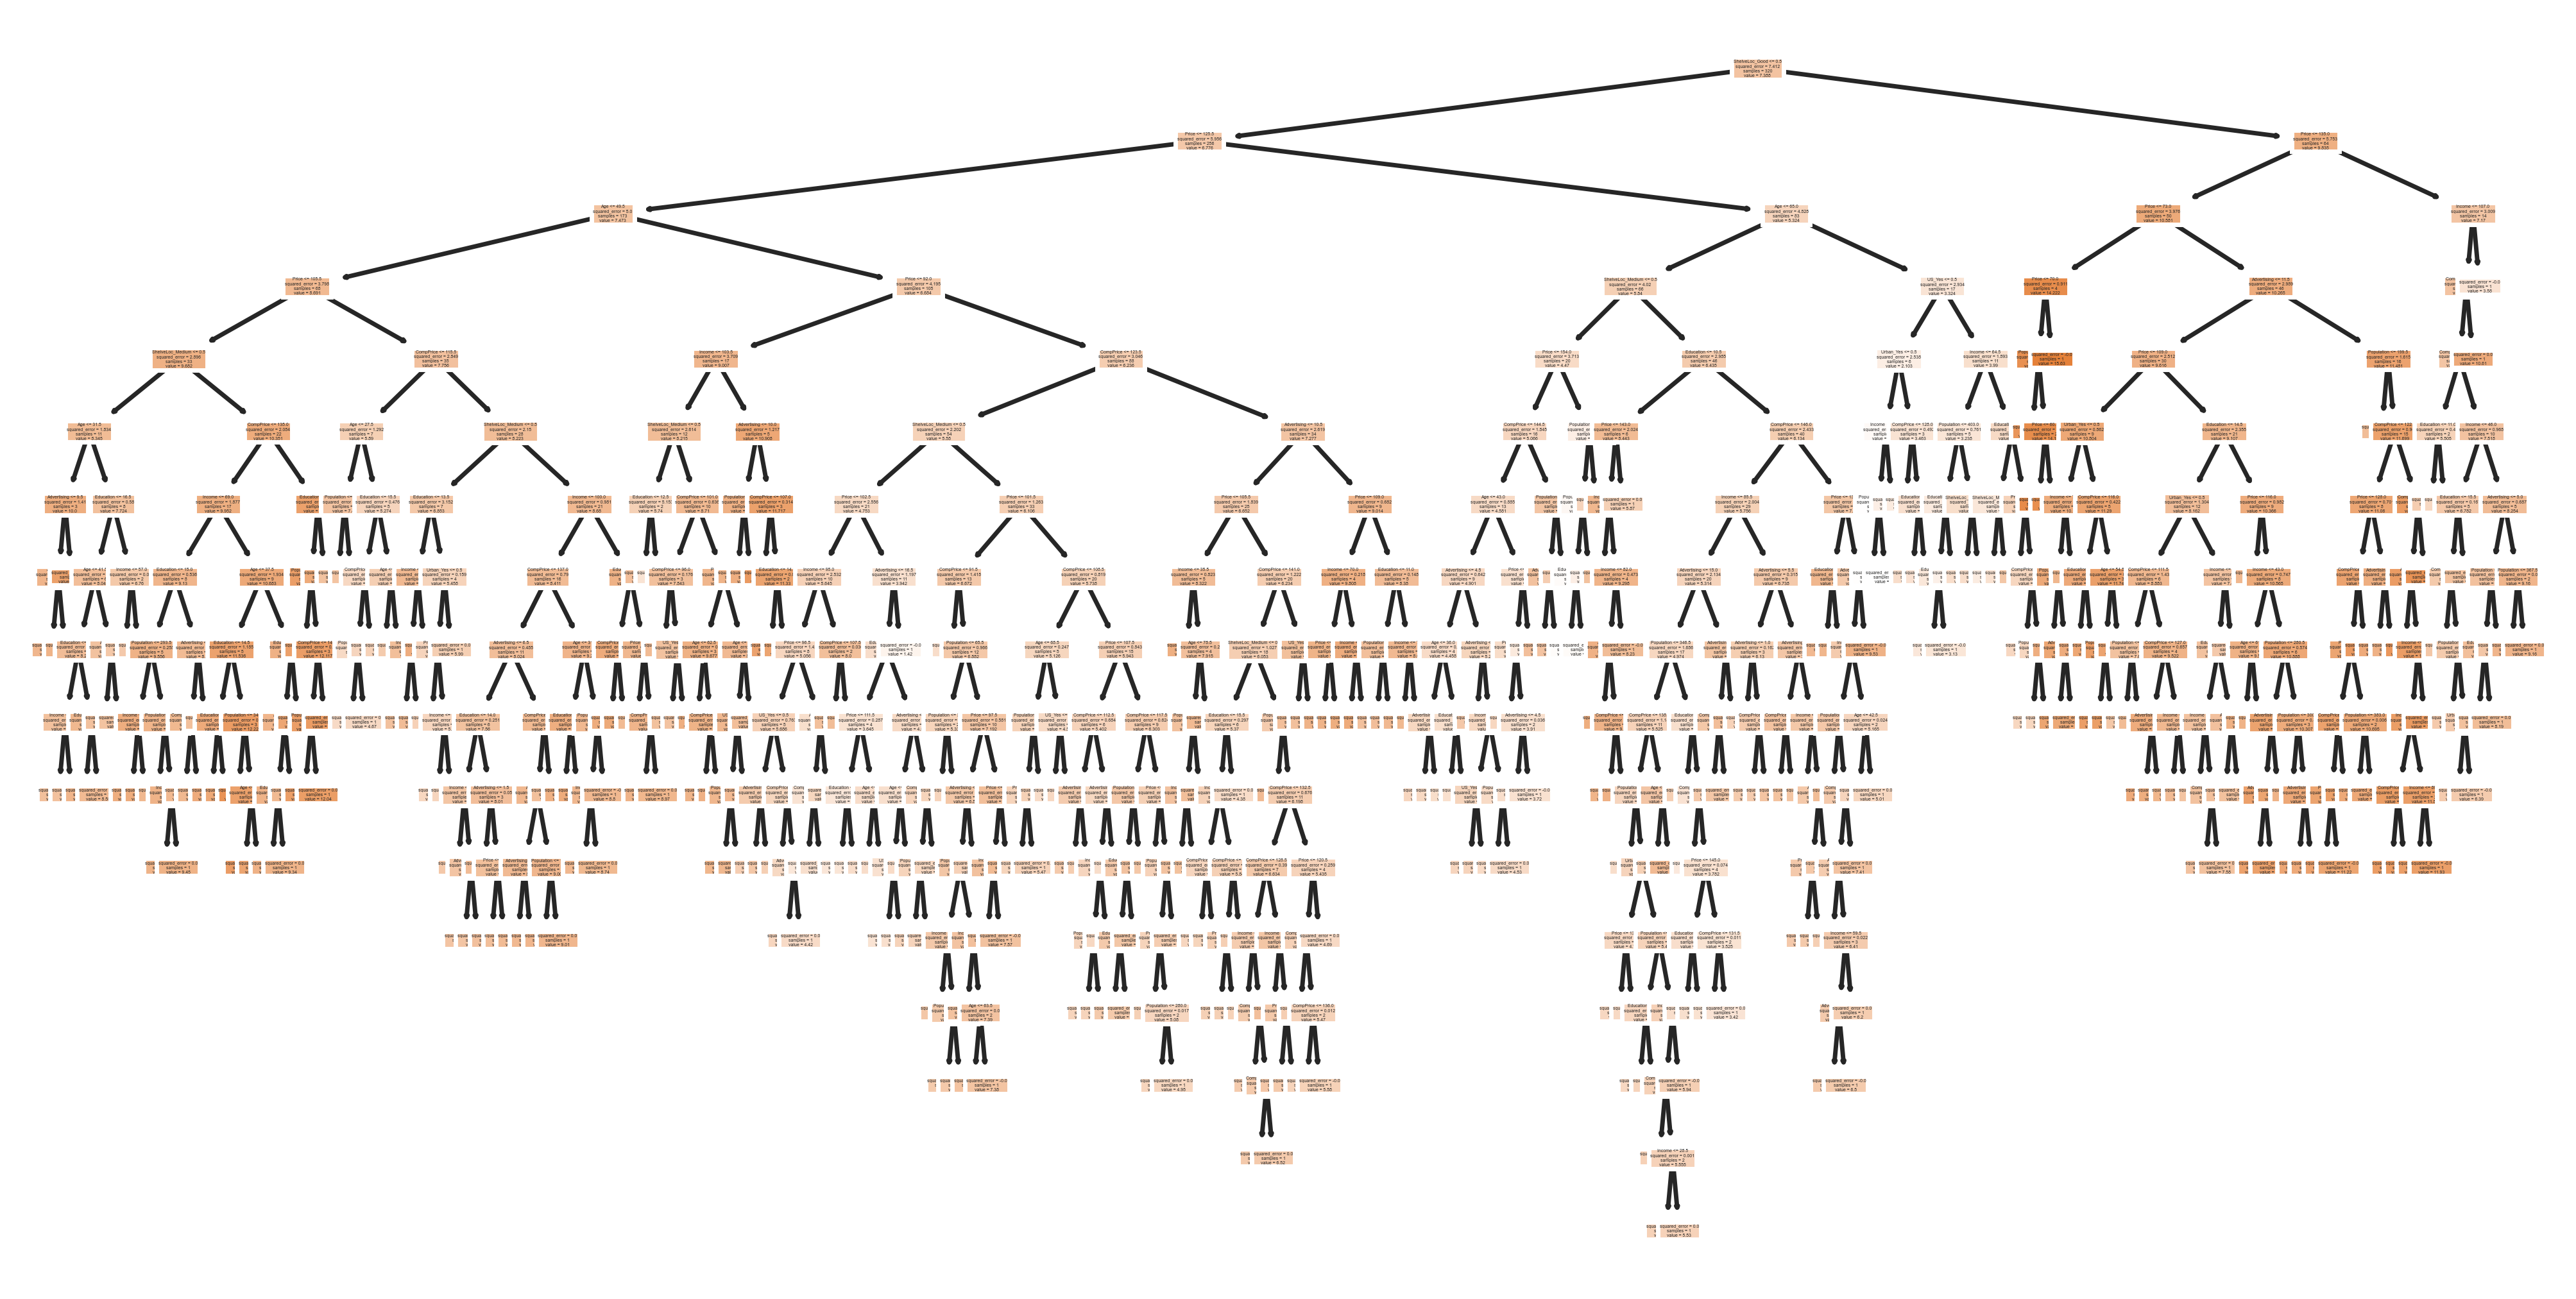

In [43]:
tree.plot_tree(dt_r, feature_names=x.columns, filled=True)
plt.show()

# Feature Importance

In [45]:
dt_r.feature_importances_

array([0.09221896, 0.05019541, 0.05585338, 0.02900603, 0.31826041,
       0.12454545, 0.05146108, 0.20195575, 0.06073469, 0.00887639,
       0.00689246])

In [48]:
feature_df = pd.DataFrame({'Feature':x.columns,
                          'Importance':dt_r.feature_importances_})
feature_df.sort_values('Importance',ascending=False,inplace=True)

In [49]:
feature_df

,Feature,Importance
4,Price,0.318260
7,ShelveLoc_Good,0.201956
5,Age,0.124545
0,CompPrice,0.092219
8,ShelveLoc_Medium,0.060735
2,Advertising,0.055853
6,Education,0.051461
1,Income,0.050195
3,Population,0.029006
9,Urban_Yes,0.008876


<AxesSubplot:xlabel='Importance', ylabel='Feature'>

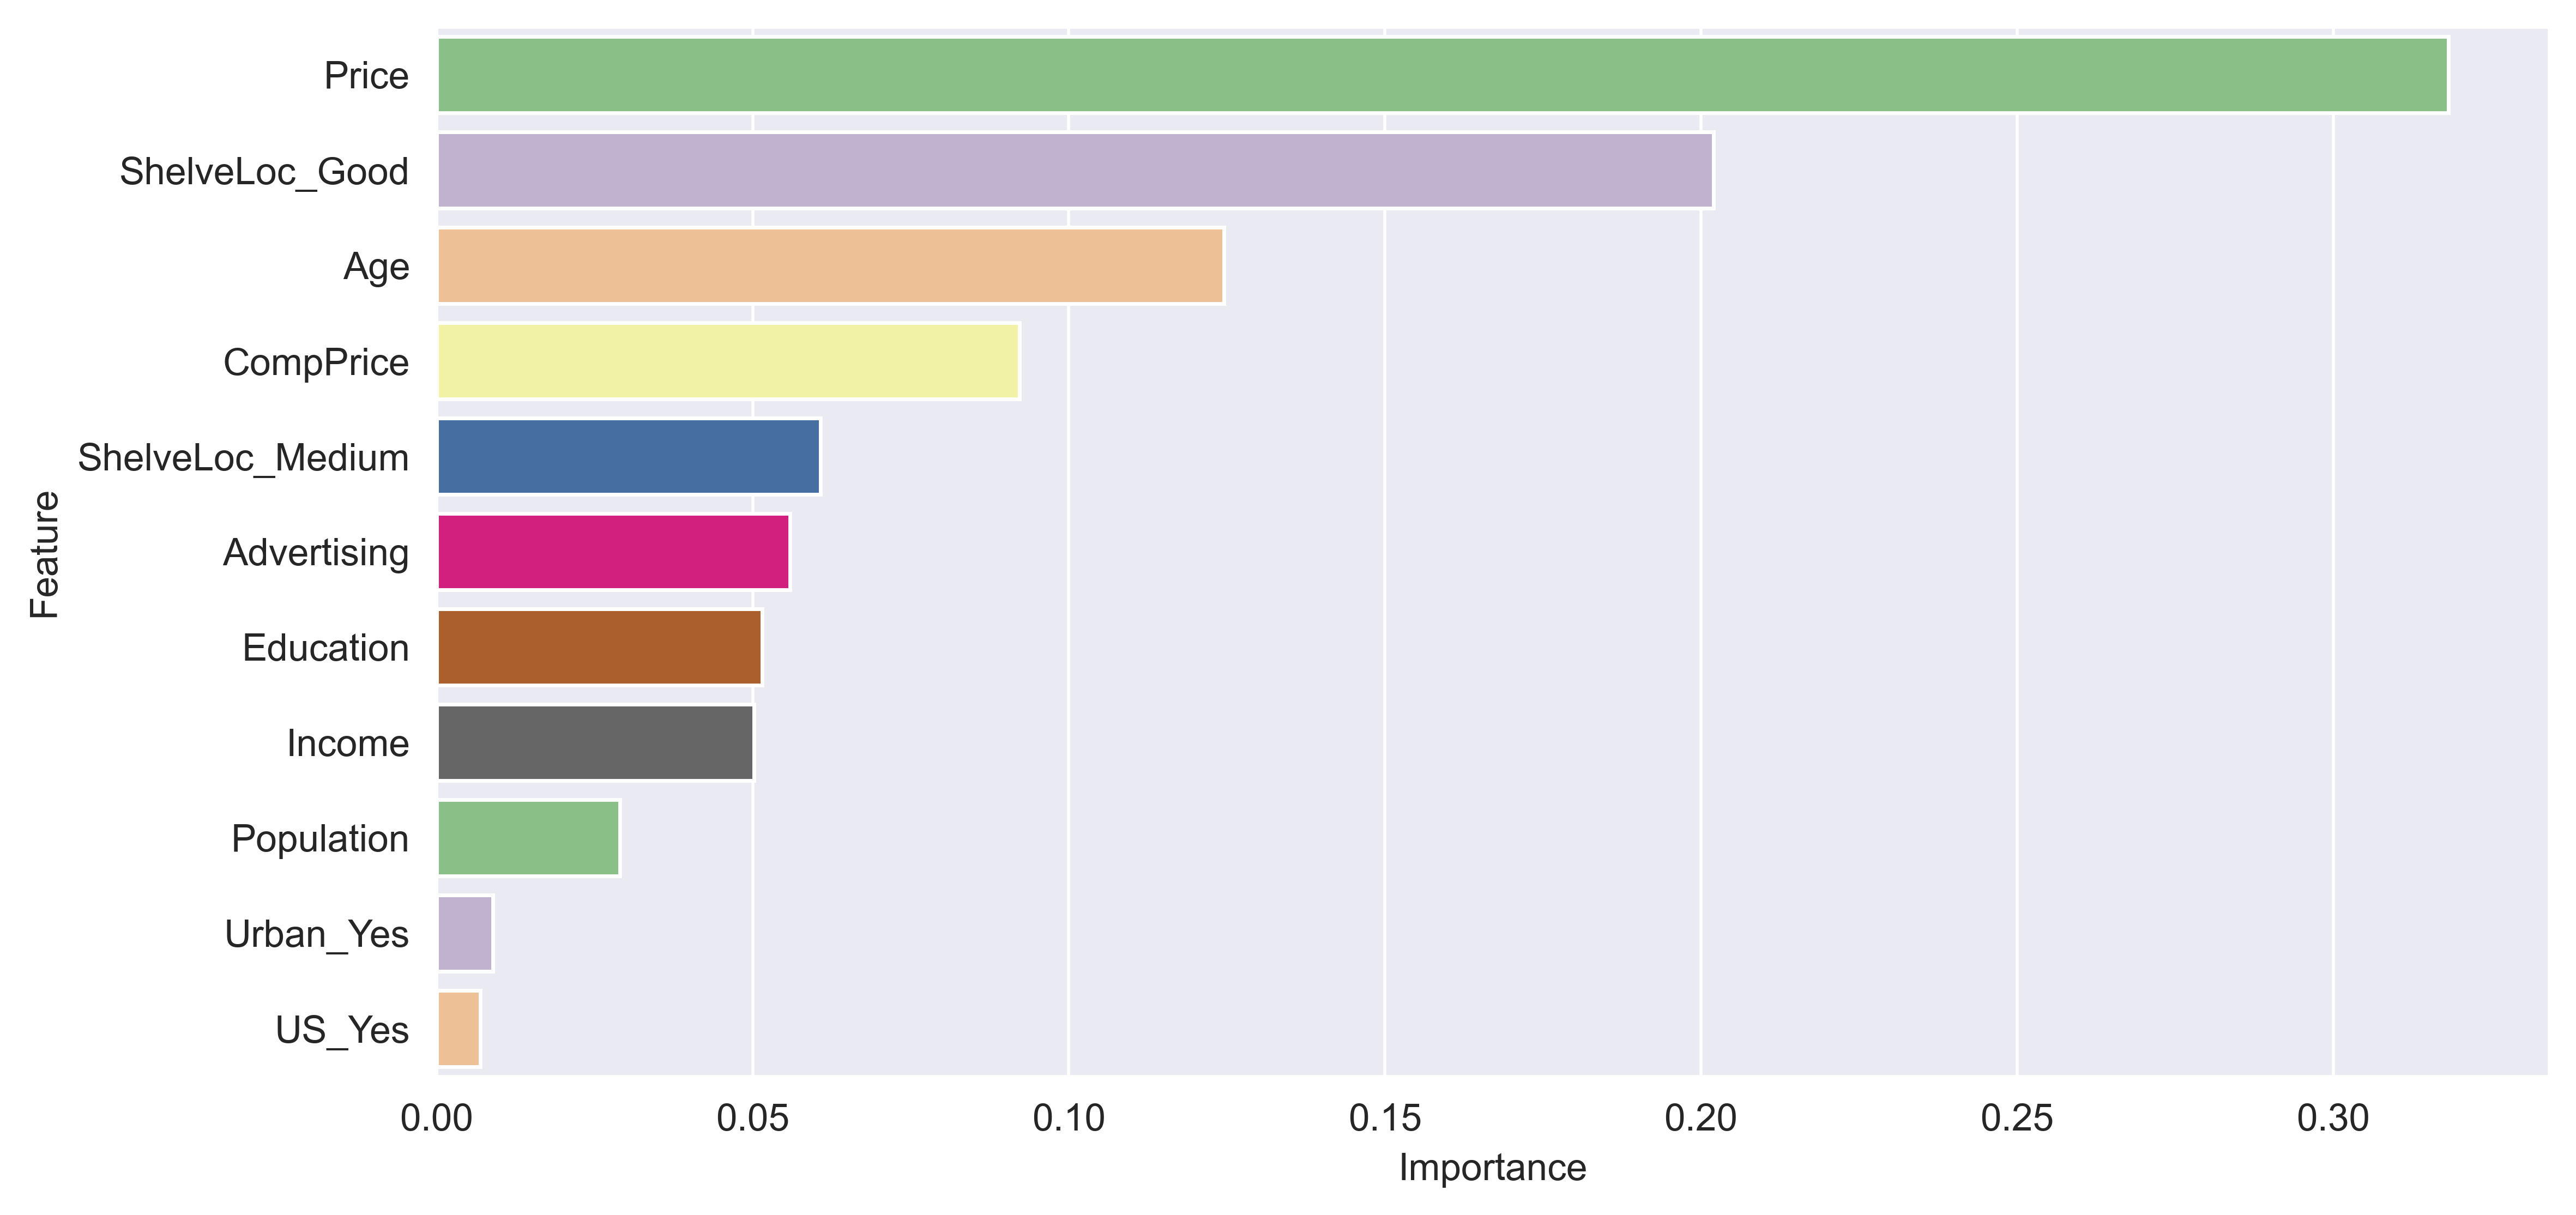

In [52]:
sns.barplot(data=feature_df,y='Feature',x='Importance',palette='Accent')

Price has highest importance